## Analisis Lifetime Motor XX

## 5. Analysis Lifetime Using ETL Framework

### 5.1 Electrical Model untuk Mencari Power Loss

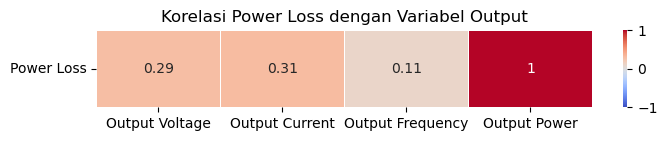

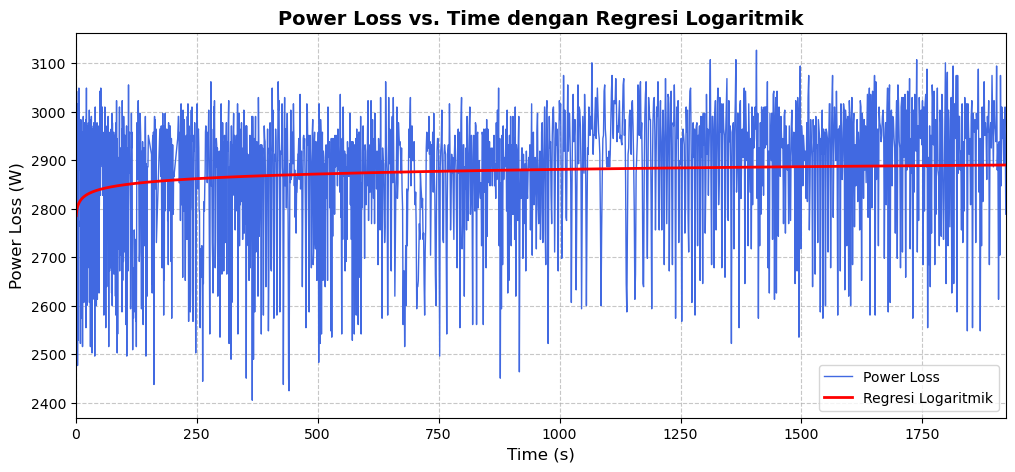

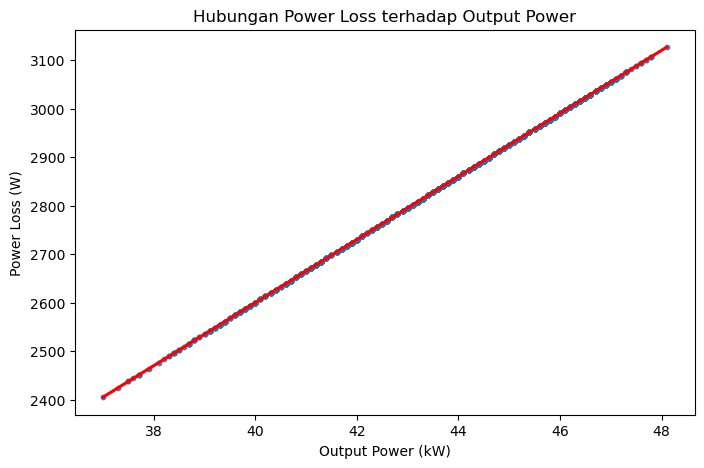

                                     0
Count                             1976
Mean                       2868.986842
Median                          2905.5
Mode                2950.9999999999973
Min                             2405.0
Max                             3126.5
Range                            721.5
Standard Deviation          133.567418
Variance                   17840.25527
Q1 (25%)                        2795.0
Q3 (75%)                        2964.0
IQR                              169.0
Skewness                     -0.958854
Kurtosis                      0.282956
Sum                          5669118.0
Product                            inf
Geometric Mean                     inf
Harmonic Mean              2862.460634
['Time', 'Output Voltage', 'Output Current', 'Output Power', 'Output Frequency', 'Power Loss', 'Casing temperature', 'Time_sec', 'Log_Regression']


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit

# Membaca file CSV
df = pd.read_csv("SP1_new.CSV")


# Konversi string ke format datetime
df["Time"] = pd.to_datetime(df["Time"].str.strip(), format="%H:%M:%S.%f")
start_time = df["Time"].iloc[0]
df["Time"] = (df["Time"] - start_time).dt.total_seconds()


# Hitung Power Loss berdasarkan efisiensi 93%
df['Power Loss'] = df['Output Power'] * (1 - 0.935) * 1000
df = df[['Time', 'Output Voltage', 'Output Current', 'Output Power', 'Output Frequency', 'Power Loss', 'Casing temperature']]


### KORELASI ###
# Menentukan Power Loss dan variabel lainnya
target_col = "Power Loss"
selected_cols = ["Output Voltage", "Output Current", "Output Frequency", "Output Power"]
filtered_cols = [col for col in selected_cols if col in df.columns]
corr = df[[target_col] + filtered_cols].corr()

corr = corr.loc[[target_col], filtered_cols]

# Menampilkan heatmap 
plt.figure(figsize=(8, 1))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Korelasi Power Loss dengan Variabel Output')
plt.yticks(rotation=0)
plt.show()



### REGRESI LOGARITMIK ###
# Normalisasi
df["Time_sec"] = df["Time"] + 1  
def log_func(x, a, b):
    return a + b * np.log(x)
valid_data = df.dropna(subset=["Time_sec", "Power Loss"])
popt, _ = curve_fit(log_func, valid_data["Time_sec"], valid_data["Power Loss"], 
                    p0=(np.mean(valid_data["Power Loss"]), 1), 
                    maxfev=2000)

# Prediksi nilai regresi logaritmik
df["Log_Regression"] = log_func(df["Time_sec"], *popt)

# Plot hasil
plt.figure(figsize=(12, 5))
sns.lineplot(x=df["Time_sec"], y=df["Power Loss"], color="royalblue", linewidth=1, label="Power Loss")
sns.lineplot(x=df["Time_sec"], y=df["Log_Regression"], color="red", linewidth=2, label="Regresi Logaritmik")
plt.xlim(0, df["Time_sec"].max())
plt.title("Power Loss vs. Time dengan Regresi Logaritmik", fontsize=14, fontweight="bold")
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Power Loss (W)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()

plt.show()

### SCATTER PLOT DENGAN REGRESI LINEAR ###
plt.figure(figsize=(8, 5))
x = df["Output Power"]  # Sumbu X
y = df["Power Loss"]    # Sumbu Y

sns.regplot(x=x, y=y, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Plot hasil
plt.title("Hubungan Power Loss terhadap Output Power")
plt.xlabel("Output Power (kW)")
plt.ylabel("Power Loss (W)")
plt.show()

# Hitung nilai statistik

kolom = "Power Loss" 
statistik = {
    "Count": [df[kolom].count()],
    "Mean": [df[kolom].mean()],
    "Median": [df[kolom].median()],
    "Mode": [", ".join(map(str, df[kolom].mode().tolist()))],  # Mode bisa lebih dari satu
    "Min": [df[kolom].min()],
    "Max": [df[kolom].max()],
    "Range": [df[kolom].max() - df[kolom].min()],
    "Standard Deviation": [df[kolom].std()],
    "Variance": [df[kolom].var()],
    "Q1 (25%)": [df[kolom].quantile(0.25)],
    "Q3 (75%)": [df[kolom].quantile(0.75)],
    "IQR": [df[kolom].quantile(0.75) - df[kolom].quantile(0.25)],
    "Skewness": [df[kolom].skew()],
    "Kurtosis": [df[kolom].kurtosis()],
    "Sum": [df[kolom].sum()],
    "Product": [df[kolom].prod()],
    "Geometric Mean": [df[kolom].prod() ** (1 / df[kolom].count()) if df[kolom].count() > 0 else None],
    "Harmonic Mean": [df[kolom].count() / sum(1 / df[kolom]) if all(df[kolom] > 0) else None],
}

stat_df = pd.DataFrame(statistik)
print(stat_df.T)  # Transpose agar tabel vertikal
print(list(df.columns))


### 5.2 Temperature Model untuk encari insulation temperature

                                                                    0
Mean                                                       142.281762
Median                                                      143.41098
Mode                144.20033999999993, 144.79235999999992, 145.38...
Range                                                        21.60474
Standard Deviation                                           4.060215
Variance                                                    16.485343
Q1 (25%)                                                   140.158195
Q3 (75%)                                                    145.18704
IQR                                                          5.028845
Skewness                                                    -0.958837
Kurtosis                                                     0.279517


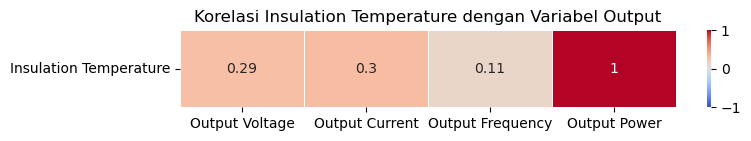

In [4]:

## Hitung insulation temp dengan fourier conduction law
df['Insulation Temperature'] = df['Casing temperature']+(df['Power Loss']*0.03036)
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')


# Hitung berbagai statistik
kolom = "Insulation Temperature"
statistik = {
    "Mean": [df[kolom].mean()],
    "Median": [df[kolom].median()],
    "Mode": [", ".join(map(str, df[kolom].mode().tolist()))],  # Mode bisa lebih dari satu
    "Range": [df[kolom].max() - df[kolom].min()],
    "Standard Deviation": [df[kolom].std()],
    "Variance": [df[kolom].var()],
    "Q1 (25%)": [df[kolom].quantile(0.25)],
    "Q3 (75%)": [df[kolom].quantile(0.75)],
    "IQR": [df[kolom].quantile(0.75) - df[kolom].quantile(0.25)],
    "Skewness": [df[kolom].skew()],
    "Kurtosis": [df[kolom].kurtosis()],
    
}

stat_df = pd.DataFrame(statistik)
print(stat_df.T)  


### KORELASI ###
# Menentukan variabel Insulator temperature dan variabel lainnya
target_col = "Insulation Temperature"
selected_cols = ["Output Voltage", "Output Current", "Output Frequency", "Output Power"]
filtered_cols = [col for col in selected_cols if col in df.columns]
corr = df[[target_col] + filtered_cols].corr()

corr = corr.loc[[target_col], filtered_cols]

# Menampilkan heatmap 
plt.figure(figsize=(8, 1))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Korelasi Insulation Temperature dengan Variabel Output')
plt.yticks(rotation=0)
plt.show()

### 5.3 Lifetime model untuk mencari estimasi lifetime motor

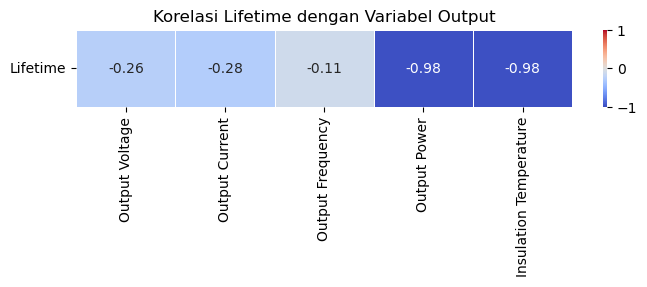

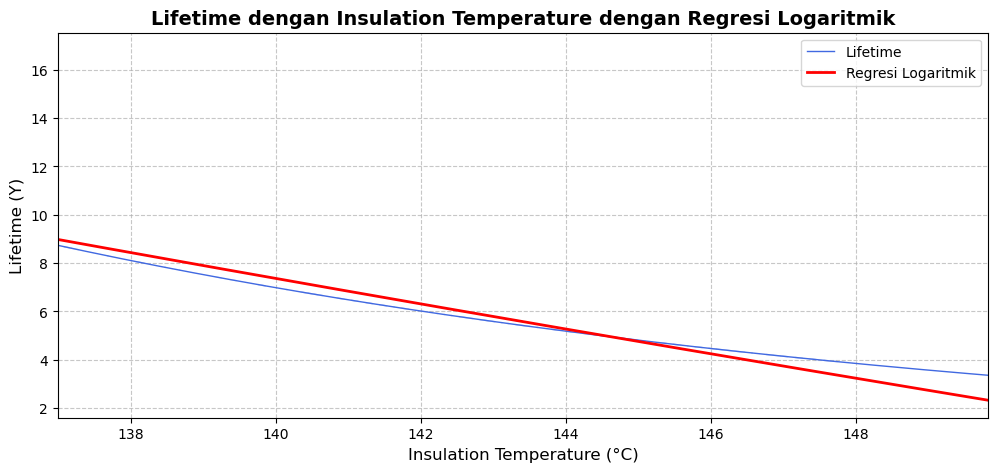

                                                                    0
Mean                                                         6.194467
Median                                                       5.415627
Mode                4.674897908605864, 4.8857936191058515, 5.10620...
Range                                                       13.448572
Standard Deviation                                           2.180887
Variance                                                     4.756269
Q1 (25%)                                                     4.744165
Q3 (75%)                                                     6.901406
IQR                                                          2.157241
Skewness                                                     1.627165
Kurtosis                                                     2.480298


In [5]:
# Hitung Lifetime menggunakan 10 degree rule
df['Lifetime'] = (20000*(2**((155-df['Insulation Temperature'])/9.3))/(365*24))


### KORELASI ###
# Menentukan variabel target (Lifetime) dan variabel lainnya
target_col = "Lifetime"
selected_cols = ["Output Voltage", "Output Current", "Output Frequency", "Output Power","Insulation Temperature"]
filtered_cols = [col for col in selected_cols if col in df.columns]
corr = df[[target_col] + filtered_cols].corr()
corr = corr.loc[[target_col], filtered_cols]

# Menampilkan heatmap 
plt.figure(figsize=(8, 1))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Korelasi Lifetime dengan Variabel Output')
plt.yticks(rotation=0)
plt.show()



### REGRESI LOGARITMIK ###


# Definisi fungsi logaritmik: y = a + b * log(x)
def log_func(x, a, b):
    return a + b * np.log(x)
valid_data = df.dropna(subset=["Insulation Temperature", "Lifetime"])
popt, _ = curve_fit(log_func, valid_data["Insulation Temperature"], valid_data["Lifetime"], 
                    p0=(np.mean(valid_data["Lifetime"]), 1), 
                    maxfev=2000)
df["Log_Regression"] = log_func(df["Insulation Temperature"], *popt)

# Plot hasil regresi logaritmik
plt.figure(figsize=(12, 5))
sns.lineplot(x=df["Insulation Temperature"], y=df["Lifetime"], color="royalblue", linewidth=1, label="Lifetime")
sns.lineplot(x=df["Insulation Temperature"], y=df["Log_Regression"], color="red", linewidth=2, label="Regresi Logaritmik")
plt.xlim(137, df["Insulation Temperature"].max())
plt.title("Lifetime dengan Insulation Temperature dengan Regresi Logaritmik", fontsize=14, fontweight="bold")
plt.xlabel("Insulation Temperature (°C)", fontsize=12)
plt.ylabel("Lifetime (Y)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()

plt.show()


# Hitung berbagai statistik
kolom = "Lifetime" 
statistik = {
    "Mean": [df[kolom].mean()],
    "Median": [df[kolom].median()],
    "Mode": [", ".join(map(str, df[kolom].mode().tolist()))],  # Mode bisa lebih dari satu
    "Range": [df[kolom].max() - df[kolom].min()],
    "Standard Deviation": [df[kolom].std()],
    "Variance": [df[kolom].var()],
    "Q1 (25%)": [df[kolom].quantile(0.25)],
    "Q3 (75%)": [df[kolom].quantile(0.75)],
    "IQR": [df[kolom].quantile(0.75) - df[kolom].quantile(0.25)],
    "Skewness": [df[kolom].skew()],
    "Kurtosis": [df[kolom].kurtosis()],
    
}

# Konversi ke DataFrame
stat_df = pd.DataFrame(statistik)

# Cetak dalam format tabel yang rapi
print(stat_df.T)  # Transpose agar tabel vertika





